In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.set_option("display.notebook_repr_html", False)
import matplotlib.pyplot as plt
import seaborn as sns

vehicles = pd.read_csv('http://www.gagolewski.com/resources/data/fueleconomy_vehicles.csv.gz',
                      comment='#')

birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv",
                          comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv",
                          comment="#")
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv",
                          comment="#")
tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv",
                          comment="#")

In [2]:
x = tips.sample(5, random_state=123)
x

     total_bill   tip     sex smoker  day    time  size
112       38.07  4.00    Male     No  Sun  Dinner     3
19        20.65  3.35    Male     No  Sat  Dinner     3
187       30.46  2.00    Male    Yes  Sun  Dinner     5
169       10.63  2.00  Female    Yes  Sat  Dinner     2
31        18.35  2.50    Male     No  Sat  Dinner     4

In [3]:
y = x['total_bill']
y

112    38.07
19     20.65
187    30.46
169    10.63
31     18.35
Name: total_bill, dtype: float64

In [4]:
y.values

array([38.07, 20.65, 30.46, 10.63, 18.35])

In [6]:
y.values - y.values #element-wise operations 

array([0., 0., 0., 0., 0.])

In [7]:
y - y

112    0.0
19     0.0
187    0.0
169    0.0
31     0.0
Name: total_bill, dtype: float64

In [8]:
y.iloc[[4,0, 3, 2, 1]]

31     18.35
112    38.07
169    10.63
187    30.46
19     20.65
Name: total_bill, dtype: float64

In [9]:
y - y.iloc[[4, 0, 3, 2, 1]]

19     0.0
31     0.0
112    0.0
169    0.0
187    0.0
Name: total_bill, dtype: float64

In [10]:
y - y.iloc[[0,3,0]]

19     NaN
31     NaN
112    0.0
112    0.0
169    0.0
187    NaN
Name: total_bill, dtype: float64

In [11]:
y

112    38.07
19     20.65
187    30.46
169    10.63
31     18.35
Name: total_bill, dtype: float64

In [12]:
y.iloc[1:] - y.iloc[:-1]

19     0.0
31     NaN
112    NaN
169    0.0
187    0.0
Name: total_bill, dtype: float64

In [13]:
y

112    38.07
19     20.65
187    30.46
169    10.63
31     18.35
Name: total_bill, dtype: float64

In [14]:
x

     total_bill   tip     sex smoker  day    time  size
112       38.07  4.00    Male     No  Sun  Dinner     3
19        20.65  3.35    Male     No  Sat  Dinner     3
187       30.46  2.00    Male    Yes  Sun  Dinner     5
169       10.63  2.00  Female    Yes  Sat  Dinner     2
31        18.35  2.50    Male     No  Sat  Dinner     4

In [15]:
x.loc[x.tip>3]

     total_bill   tip   sex smoker  day    time  size
112       38.07  4.00  Male     No  Sun  Dinner     3
19        20.65  3.35  Male     No  Sat  Dinner     3

In [17]:
x.loc[x.tip.sample(frac=1.0, random_state=123) > 3]

     total_bill   tip   sex smoker  day    time  size
112       38.07  4.00  Male     No  Sun  Dinner     3
19        20.65  3.35  Male     No  Sat  Dinner     3

In [18]:
x.tip.sample(frac=1.0, random_state=123) > 3

19      True
169    False
31     False
112     True
187    False
Name: tip, dtype: bool

In [19]:
x.tip

112    4.00
19     3.35
187    2.00
169    2.00
31     2.50
Name: tip, dtype: float64

In [21]:
x.loc[pd.Series([True, False, True, False, False], index = [19, 169, 31, 187, 112])]

    total_bill   tip   sex smoker  day    time  size
19       20.65  3.35  Male     No  Sat  Dinner     3
31       18.35  2.50  Male     No  Sat  Dinner     4

In [22]:
vehicles.head()

      id        make                model  year                        class  \
0  27550  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
1  28426  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
2  27549  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
3  28425  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
4   1032  AM General  Post Office DJ5 2WD  1985  Special Purpose Vehicle 2WD   

             trans             drive  cyl  displ     fuel  hwy  cty  
0  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18  
1  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18  
2  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13  
3  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13  
4  Automatic 3-spd  Rear-Wheel Drive  4.0    2.5  Regular   17   16  

In [24]:
sample = vehicles.sample(n=5, random_state=123)

Given vehicles, convert the values in cty (city-) and hwy (highway-fuel economy -- given in mpg) to l/100 km.

Then add new columns z_cty and z_hwy, that give z-scores of cty and hwy (i.e., standardize these columns).

Moreover, add two other columns z_cty_rel and z_hwy_rel, which denote the corresponding z-scores 
relative to (grouped by) class.

In [29]:
sample

          id       make            model  year                       class  \
15081  25581        GMC   Sierra C15 2WD  2009  Standard Pickup Trucks 2WD   
19808  16038      Lexus           RX 300  2000      Midsize Station Wagons   
4915    6394  Chevrolet         Corvette  1990                 Two Seaters   
31466  28340     Toyota        Truck 2WD  1984  Standard Pickup Trucks 2WD   
26707  21243    Pontiac  Montana SVX FWD  2005               Minivan - 2WD   

                 trans              drive  cyl  displ     fuel  hwy  cty  
15081  Automatic 6-spd   Rear-Wheel Drive  8.0    6.0  Regular   19   14  
19808  Automatic 4-spd  Front-Wheel Drive  6.0    3.0  Regular   22   17  
4915   Automatic 4-spd   Rear-Wheel Drive  8.0    5.7  Premium   22   15  
31466     Manual 5-spd      2-Wheel Drive  4.0    2.4   Diesel   28   26  
26707  Automatic 4-spd  Front-Wheel Drive  6.0    3.5  Regular   23   16  

In [30]:
sample['hwy']

15081    19
19808    22
4915     22
31466    28
26707    23
Name: hwy, dtype: int64

In [61]:
vehicles['new_hwy']=((vehicles['hwy'] * 1.6 / 3.78541)**-1) *100

In [62]:
vehicles['new_cty']=((vehicles['cty'] * 1.6 / 3.78541)**-1) * 100

In [64]:
vehicles.head()

      id        make                model  year                        class  \
0  27550  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
1  28426  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
2  27549  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
3  28425  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
4   1032  AM General  Post Office DJ5 2WD  1985  Special Purpose Vehicle 2WD   

             trans             drive  cyl  displ     fuel  hwy  cty  \
0  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
1  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
2  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
3  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
4  Automatic 3-spd  Rear-Wheel Drive  4.0    2.5  Regular   17   16   

     new_hwy    new_cty  
0  13.916949  13.143785  
1  13.916949  13.143785  
2  18.199087  

In [65]:
vehicles['z_hwy']=(vehicles['new_hwy'] - vehicles['new_hwy'].mean())/vehicles['new_hwy'].std()

In [66]:
vehicles['z_cty']=(vehicles['new_cty'] - vehicles['new_cty'].mean())/vehicles['new_cty'].std()

In [68]:
vehicles.head()

      id        make                model  year                        class  \
0  27550  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
1  28426  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
2  27549  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
3  28425  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
4   1032  AM General  Post Office DJ5 2WD  1985  Special Purpose Vehicle 2WD   

             trans             drive  cyl  displ     fuel  hwy  cty  \
0  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
1  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
2  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
3  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
4  Automatic 3-spd  Rear-Wheel Drive  4.0    2.5  Regular   17   16   

     new_hwy    new_cty     z_hwy     z_cty  
0  13.916949  13.143785  1.166924 -0.365269  


In [79]:
g = vehicles.groupby('class')

In [82]:
g.apply((vehicles.new_hwy - vehicles.new_hwy.mean())/vehicles.new_hwy.std() )

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [92]:
# zscore = (vehicles['new_cty']- vehicles['new_cty'].mean()) / vehicles['new_cty'].std()
zscore = lambda x: (x-x.mean())/x.std()

In [100]:
vehicles['z_cty_rel']=vehicles.groupby('class').new_cty.transform(zscore)

In [102]:
vehicles['z_hwy_rel']=vehicles.groupby('class').new_hwy.transform(zscore)

In [103]:
vehicles.head()

      id        make                model  year                        class  \
0  27550  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
1  28426  AM General    DJ Po Vehicle 2WD  1984  Special Purpose Vehicle 2WD   
2  27549  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
3  28425  AM General     FJ8c Post Office  1984  Special Purpose Vehicle 2WD   
4   1032  AM General  Post Office DJ5 2WD  1985  Special Purpose Vehicle 2WD   

             trans             drive  cyl  displ     fuel  hwy  cty  \
0  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
1  Automatic 3-spd     2-Wheel Drive  4.0    2.5  Regular   17   18   
2  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
3  Automatic 3-spd     2-Wheel Drive  6.0    4.2  Regular   13   13   
4  Automatic 3-spd  Rear-Wheel Drive  4.0    2.5  Regular   17   16   

     new_hwy    new_cty     z_hwy     z_cty  z_cty_rel  z_hwy_rel  
0  13.916949  13.143785 

In [104]:
def zscore(x):
    return (x-x.mean()/x.std())

In [106]:
zscore(vehicles['new_hwy'])

0        10.036257
1        10.036257
2        14.318395
3        14.318395
4        10.036257
5        14.318395
6         7.385409
7         5.218852
8         4.568884
9         5.218852
10        4.881831
11        4.277520
12        5.218852
13        4.881831
14        4.277520
15        5.218852
16        6.405749
17        6.405749
18        6.873314
19        6.405749
20        6.873314
21        6.405749
22        6.873314
23        4.881831
24        4.881831
25        5.218852
26        4.881831
27        5.582833
28        4.881831
29        4.881831
           ...    
33412    11.891850
33413    13.018460
33414     4.277520
33415     4.881831
33416     4.881831
33417     4.568884
33418     4.277520
33419     4.277520
33420     4.568884
33421     4.277520
33422     1.889750
33423     1.889750
33424     2.345312
33425     2.345312
33426     2.345312
33427     1.889750
33428     1.889750
33429     1.889750
33430     1.889750
33431     1.889750
33432     1.889750
33433     2.

In [105]:
vehicles['z_hwy_rel']=vehicles.groupby('class').new_hwy.transform(zscore(vehicles['new_hwy']))

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [108]:
pd.set_option('display.notebook_repr_html', True) #prints dataframes in raw format

vehicles.head(20)

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty,new_hwy,new_cty,z_hwy,z_cty,z_cty_rel,z_hwy_rel
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18,13.916949,13.143785,1.166924,-0.365269,-0.742395,0.548454
1,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18,13.916949,13.143785,1.166924,-0.365269,-0.742395,0.548454
2,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13,18.199087,18.199087,2.720036,1.020516,0.801337,1.965772
3,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13,18.199087,18.199087,2.720036,1.020516,0.801337,1.965772
4,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4.0,2.5,Regular,17,16,13.916949,14.786758,1.166924,0.085111,-0.240682,0.548454
5,1033,AM General,Post Office DJ8 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,6.0,4.2,Regular,13,13,18.199087,18.199087,2.720036,1.020516,0.801337,1.965772
6,3347,ASC Incorporated,GNX,1987,Midsize Cars,Automatic 4-spd,Rear-Wheel Drive,6.0,3.8,Premium,21,14,11.266101,16.899152,0.205473,0.664171,1.063910,0.800650
7,13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4.0,2.2,Regular,26,20,9.099543,11.829406,-0.580328,-0.725574,-0.235431,-0.038424
8,13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4.0,2.2,Regular,28,22,8.449576,10.754006,-0.816068,-1.020368,-0.540811,-0.327755
9,13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.0,Regular,26,18,9.099543,13.143785,-0.580328,-0.365269,0.137812,-0.038424


In [109]:
weather = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz",
                          comment="#")

In [110]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [111]:
# 1. Convert temperature to Celsius.
# 2. Compute daily mean temperatures for the JFK airport. 
# If some hourly temperature measurements is missing, linearly interpolate between
# the preceding and following non-missing data, e.g., a temperature sequence 
# of [..., 10, NaN, NaN, 40, ...] should be transformed to [..., 10, 20, 30, 40, ...].
# 3. Present the daily mean temperatures on a plot. The x-axis labels should be human-readable and intuitive.
# 4. Choose days with greater mean temperature than in the preceding day.
# 5. Find 5 hottest days.

In [112]:
weather['temp_c'] = (weather['temp'] - 32) * 5/9

In [113]:
weather['temp_c'].head()

0    2.8
1    2.8
2    3.3
3    3.3
4    3.3
Name: temp_c, dtype: float64

In [154]:
jfk_df = weather.loc[weather.origin == 'JFK']
jfk_df.head(25)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,temp_c,jfk_weather
8708,JFK,2013,1,1,0,37.94,23.00,54.51,240.0,16.11092,18.540125,0.0,1014.4,10.0,2013-01-01 01:00:00,3.3,56.517263
8709,JFK,2013,1,1,1,37.94,24.08,57.04,250.0,17.26170,19.864419,0.0,1013.5,10.0,2013-01-01 02:00:00,3.3,56.517263
8710,JFK,2013,1,1,2,39.02,24.98,56.77,240.0,19.56326,22.513008,0.0,1013.0,10.0,2013-01-01 03:00:00,3.9,56.517263
8711,JFK,2013,1,1,3,39.02,26.06,59.37,240.0,18.41248,21.188714,0.0,1013.2,10.0,2013-01-01 04:00:00,3.9,56.517263
8712,JFK,2013,1,1,4,39.02,24.98,56.77,260.0,14.96014,17.215830,0.0,1013.2,10.0,2013-01-01 05:00:00,3.9,56.517263
8713,JFK,2013,1,1,6,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 07:00:00,3.9,56.517263
8714,JFK,2013,1,1,7,39.02,26.06,59.37,270.0,11.50780,13.242946,0.0,1012.4,10.0,2013-01-01 08:00:00,3.9,56.517263
8715,JFK,2013,1,1,8,39.92,26.96,59.50,260.0,14.96014,17.215830,0.0,1012.7,10.0,2013-01-01 09:00:00,4.4,56.517263
8716,JFK,2013,1,1,9,39.92,28.04,62.21,250.0,17.26170,19.864419,0.0,1012.6,10.0,2013-01-01 10:00:00,4.4,56.517263
8717,JFK,2013,1,1,10,39.02,26.96,61.63,260.0,14.96014,17.215830,0.0,1012.1,10.0,2013-01-01 11:00:00,3.9,56.517263


In [156]:
jfk_df.groupby(['day', 'jfk_weather']).mean().temp

day  jfk_weather
1    56.517263      56.517263
2    54.408125      54.408125
3    53.501702      53.501702
4    52.957143      52.957143
5    54.947805      54.947805
6    54.775625      54.775625
7    55.089375      55.089375
8    54.485000      54.485000
9    55.192500      55.192500
10   55.818125      55.818125
11   56.795000      56.795000
12   56.325000      56.325000
13   52.713798      52.713798
14   52.224375      52.224375
15   53.869375      53.869375
16   54.947178      54.947178
17   55.293125      55.293125
18   53.264375      53.264375
19   54.776585      54.776585
20   55.852500      55.852500
21   54.065993      54.065993
22   54.505645      54.505645
23   53.474755      53.474755
24   50.983125      50.983125
25   48.390625      48.390625
26   51.475618      51.475618
27   54.654286      54.654286
28   53.824375      53.824375
29   56.409773      56.409773
30   57.311136      57.311136
31   62.781259      62.781259
Name: temp, dtype: float64

In [175]:
jfk_df = weather.loc[weather.origin == 'JFK']

In [187]:
jfk_df['temp_c'].isnull().sum()

0

In [189]:
jfk_df['hour']

8708      0
8709      1
8710      2
8711      3
8712      4
8713      6
8714      7
8715      8
8716      9
8717     10
8718     11
8719     12
8720     13
8721     14
8722     15
8723     16
8724     17
8725     18
8726     19
8727     20
8728     21
8729     22
8730     23
8731      0
8732      1
8733      2
8734      3
8735      4
8736      5
8737      6
         ..
17389    18
17390    19
17391    20
17392    21
17393    22
17394    23
17395     0
17396     1
17397     2
17398     3
17399     4
17400     5
17401     6
17402     7
17403     8
17404     9
17405    10
17406    11
17407    12
17408    13
17409    14
17410    15
17411    16
17412    17
17413    18
17414    19
17415    20
17416    21
17417    22
17418    23
Name: hour, Length: 8711, dtype: int64

In [192]:
daily_temp = jfk_df.groupby(['year','month', 'day']).mean().temp_c.reset_index()

In [193]:
type(daily_temp)

pandas.core.frame.DataFrame

In [194]:
daily_temp

,year,month,day,temp_c
0,2013,1,1,3.817391
1,2013,1,2,-1.920833
2,2013,1,3,-1.237500
3,2013,1,4,1.129167
4,2013,1,5,2.720833
5,2013,1,6,3.029167
6,2013,1,7,5.479167
7,2013,1,8,3.708333
8,2013,1,9,4.908333
9,2013,1,10,7.250000


In [195]:
weather_jfk = weather.query("origin == 'JFK'").loc[:, ['year','month', 'day', 'hour', 'temp_c']]

In [198]:
# convert the times to pd.to_datetime

what_we_have = pd.to_datetime(weather_jfk.loc[:, ['year','month', 'day', 'hour']])
what_we_have

8708    2013-01-01 00:00:00
8709    2013-01-01 01:00:00
8710    2013-01-01 02:00:00
8711    2013-01-01 03:00:00
8712    2013-01-01 04:00:00
8713    2013-01-01 06:00:00
8714    2013-01-01 07:00:00
8715    2013-01-01 08:00:00
8716    2013-01-01 09:00:00
8717    2013-01-01 10:00:00
8718    2013-01-01 11:00:00
8719    2013-01-01 12:00:00
8720    2013-01-01 13:00:00
8721    2013-01-01 14:00:00
8722    2013-01-01 15:00:00
8723    2013-01-01 16:00:00
8724    2013-01-01 17:00:00
8725    2013-01-01 18:00:00
8726    2013-01-01 19:00:00
8727    2013-01-01 20:00:00
8728    2013-01-01 21:00:00
8729    2013-01-01 22:00:00
8730    2013-01-01 23:00:00
8731    2013-01-02 00:00:00
8732    2013-01-02 01:00:00
8733    2013-01-02 02:00:00
8734    2013-01-02 03:00:00
8735    2013-01-02 04:00:00
8736    2013-01-02 05:00:00
8737    2013-01-02 06:00:00
                ...        
17389   2013-12-29 18:00:00
17390   2013-12-29 19:00:00
17391   2013-12-29 20:00:00
17392   2013-12-29 21:00:00
17393   2013-12-29 2

In [199]:
all_hours = pd.date_range("2013-01-01 00:00:00", periods = 365*24, freq="H")
all_hours

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2013-12-31 14:00:00', '2013-12-31 15:00:00',
               '2013-12-31 16:00:00', '2013-12-31 17:00:00',
               '2013-12-31 18:00:00', '2013-12-31 19:00:00',
               '2013-12-31 20:00:00', '2013-12-31 21:00:00',
               '2013-12-31 22:00:00', '2013-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [200]:
difference = all_hours[~all_hours.isin(what_we_have)]

In [201]:
len(difference)

49

In [204]:
weather_jfk_2 = pd.concat((weather_jfk,pd.DataFrame({
    'year': difference.year,
    'month': difference.month,
    'day': difference.day,
    'hour': difference.hour,
    'temp_c': np.nan
})),axis=0).sort_values(['year','month','day','hour']).reset_index()

In [206]:
weather_jfk_2.head(10)

,index,year,month,day,hour,temp_c
0,8708,2013,1,1,0,3.3
1,8709,2013,1,1,1,3.3
2,8710,2013,1,1,2,3.9
3,8711,2013,1,1,3,3.9
4,8712,2013,1,1,4,3.9
5,0,2013,1,1,5,NaN
6,8713,2013,1,1,6,3.9
7,8714,2013,1,1,7,3.9
8,8715,2013,1,1,8,4.4
9,8716,2013,1,1,9,4.4


In [208]:
weather_jfk_2['temp_c']=weather_jfk_2['temp_c'].interpolate()

In [212]:
weather_jfk_3 = weather_jfk_2.groupby(['year','month', 'day']).mean().temp_c.reset_index()

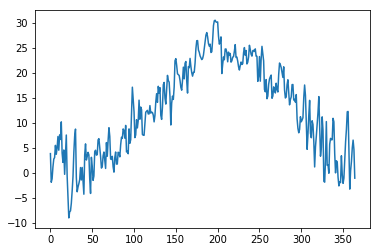

In [213]:
plt.plot(weather_jfk_3['temp_c'])

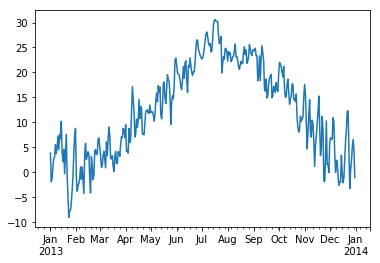

In [217]:
weather_jfk_3.index = pd.to_datetime(weather_jfk_3.loc[:, ['year', 'month', 'day']])
weather_jfk_3['temp_c'].plot()

In [218]:
weather_jfk_3

,year,month,day,temp_c
2013-01-01,2013,1,1,3.820833
2013-01-02,2013,1,2,-1.920833
2013-01-03,2013,1,3,-1.237500
2013-01-04,2013,1,4,1.129167
2013-01-05,2013,1,5,2.720833
2013-01-06,2013,1,6,3.029167
2013-01-07,2013,1,7,5.479167
2013-01-08,2013,1,8,3.708333
2013-01-09,2013,1,9,4.908333
2013-01-10,2013,1,10,7.250000


In [ ]:
daily_temperatures.iloc[1:,].reset_index(drop=True).loc[(daily_temperatures.iloc[1:,].temp.reset_index(drop=True)-daily_temperatures.iloc[:-1,].temp.reset_index(drop=True)).reset_index(drop=True)>0].head()

In [220]:
weather_jfk_3.loc[weather_jfk_3['temp_c'].diff()>0,:]

,year,month,day,temp_c
2013-01-03,2013,1,3,-1.237500
2013-01-04,2013,1,4,1.129167
2013-01-05,2013,1,5,2.720833
2013-01-06,2013,1,6,3.029167
2013-01-07,2013,1,7,5.479167
2013-01-09,2013,1,9,4.908333
2013-01-10,2013,1,10,7.250000
2013-01-12,2013,1,12,7.579167
2013-01-14,2013,1,14,10.191667
2013-01-17,2013,1,17,4.550000


In [221]:
weather_jfk_3.sort_values(['temp_c'], ascending=False).head(5)

,year,month,day,temp_c
2013-07-17,2013,7,17,30.579167
2013-07-16,2013,7,16,30.483333
2013-07-20,2013,7,20,30.245833
2013-07-18,2013,7,18,30.241667
2013-07-19,2013,7,19,30.187500
